# Assignment to build a Machine Learning model
### sample-data from the GitHub repo
### https://github.com/internbuddy/foster-app.git



### import required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load Data From xlsx File

In [2]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-5d28146c-4cf0-4b72-87f0-5af1680899dd',
    'IBM_API_KEY_ID': 'LHQwEootHjW4mszz0W7x2zyju8RcFAol-uLLUzGvnBoj',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'projectv2-donotdelete-pr-qceg8et8geldcm',
    'FILE': 'Data_Science_2020_v2.xlsx'
}


In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c112622987044006923bcdea209900fd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LHQwEootHjW4mszz0W7x2zyju8RcFAol-uLLUzGvnBoj',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c112622987044006923bcdea209900fd.get_object(Bucket='projectv2-donotdelete-pr-qceg8et8geldcm',Key='Data_Science_2020_v2.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_excel(body)
data.head()


,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Data Science (out of 3),Other skills,Institute,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,DS0001,Bangalore,1,0,3,"Machine Learning, Arduino, C Programming, CSS,...",Global Academy of Technology,Bachelor of Engineering (B.E),Electrical and Electronics Engineering,2019,NaN,7.73/10,NaN,NaN
1,DS0002,Mumbai,2,1,2,"AutoCAD, MS-Office, Machine Learning, Microsof...","Aegis School Of Business, Data Science, Cyber ...",NaN,PGP,2020,NaN,68.00/100,NaN,NaN
2,DS0003,Mumbai,2,0,0,"C++ Programming, Data Structures, Image Proces...","VJTI, Mumbai",Bachelor of Technology (B.Tech),Information Systems,2018,NaN,8.85/10,91.40/91.40,9.40/9.40
3,DS0004,Dhanbad,2,0,2,"Algorithms, C++ Programming, Data Structures, ...",IIT (ISM) Dhanbad,Integrated M.Tech,Mathematics and Computing,2021,NaN,8.40/10,91.80/91.80,10.00/10.00
4,DS0005,Bangalore,2,0,0,"MS-Word, Python, SQL, MS-Excel",Vvce,Bachelor of Engineering (B.E),Electronics and Communication,2018,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Application_ID', 'Current City', 'Python (out of 3)',
       'R Programming (out of 3)', 'Data Science (out of 3)', 'Other skills',
       'Institute', 'Degree', 'Stream', 'Current Year Of Graduation',
       'Performance_PG', 'Performance_UG', 'Performance_12', 'Performance_10'],
      dtype='object')

### Stastical Description of Data

In [5]:
data['Performance_PG']=data['Performance_PG'].transform(lambda x:x.fillna('No degree') )

In [6]:
df1=data['Performance_PG']=data['Performance_PG'].str.split('/',expand=True)
df2=data['Performance_UG']=data['Performance_UG'].str.split('/',expand=True)
df3=data['Performance_12']=data['Performance_12'].str.split('/',expand=True)
df4=data['Performance_10']=data['Performance_10'].str.split('/',expand=True)


In [7]:
df1.drop(1,axis=1,inplace=True)
df2.drop(1,axis=1,inplace=True)
df3.drop(1,axis=1,inplace=True)
df4.drop(1,axis=1,inplace=True)

In [8]:
df1 = df1.rename(columns={0:'Performance_PG'})
df2 = df2.rename(columns={0:'Performance_UG'})
df3 = df3.rename(columns={0:'Performance_12'})
df4 = df4.rename(columns={0:'Performance_10'})

In [9]:
score=pd.concat([df1,df2,df3,df4],axis=1)


In [10]:
data.drop(['Performance_PG','Performance_UG','Performance_12','Performance_10'],axis=1,inplace=True)

In [11]:
data=pd.concat([data,score],axis=1)

In [12]:
df2=data['Performance_UG']=data['Performance_UG'].astype(float)
df3=data['Performance_12']=data['Performance_12'].astype(float)
df4=data['Performance_10']=data['Performance_10'].astype(float)

In [13]:
df2=data['Performance_UG']=data['Performance_UG'].transform(lambda x:x.fillna(data['Performance_UG'].mean()))
df3=data['Performance_12']=data['Performance_12'].transform(lambda x:x.fillna(data['Performance_12'].mean()))
df4=data['Performance_10']=data['Performance_10'].transform(lambda x:x.fillna(data['Performance_10'].mean()))

In [14]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [15]:
std=StandardScaler()
lable=preprocessing.LabelEncoder()


In [16]:
data['Other skills']=data['Other skills'].transform(lambda x:x.fillna('unknow'))
data['Degree']=data['Degree'].transform(lambda x:x.fillna('unknow'))
data['Stream']=data['Stream'].transform(lambda x:x.fillna('unknow'))

In [17]:

Weightage_UG_2020=[]
c=0
for i in range(0,611):
    
    Year = data.iloc[i,9]
    UG = data.iloc[i,7]
    
    if (Year==2020 and (UG =='Bachelor of Engineering (B.E)' or UG =='Bachelor of Technology (B.Tech)')):
        Weightage_UG_2020.append(10) 
    else:
        Weightage_UG_2020.append(0)
    c=c+1    
 


In [18]:
Weightage_UG_2019=[]
c=0
for i in range(0,611):
    
    Year = data.iloc[i,9]
    UG = data.iloc[i,7]
    
    if (Year==2019 and (UG =='Bachelor of Engineering (B.E)' or UG =='Bachelor of Technology (B.Tech)')):
        Weightage_UG_2019.append(8) 
    else:
        Weightage_UG_2019.append(0)
    c=c+1    



In [19]:
Weightage_UG_2018=[]
c=0
for i in range(0,611):
    
    Year = data.iloc[i,9]
    UG = data.iloc[i,7]
    
    if (Year<=2018 and (UG =='Bachelor of Engineering (B.E)' or UG =='Bachelor of Technology (B.Tech)')):
        Weightage_UG_2018.append(5) 
    else:
        Weightage_UG_2018.append(0)
    c=c+1    



In [20]:
Weightage_PG_2020=[]
c=0
for i in range(0,611):
    
    Year = data.iloc[i,9]
    PG = data.iloc[i,7]
    
    if (Year==2020 and (PG =='Master of Science (M.Sc)' or PG =='Master of Technology (M.Tech)')):
        Weightage_PG_2020.append(7) 
    else:
        Weightage_PG_2020.append(0)
    c=c+1    


    

In [21]:
Weightage_PG_2019=[]
c=0
for i in range(0,611):
    
    Year = data.iloc[i,9]
    PG = data.iloc[i,7]
    
    if (Year<=2019 and (PG =='Master of Science (M.Sc)' or PG =='Master of Technology (M.Tech)')):
         Weightage_PG_2019.append(3) 
    else:
        Weightage_PG_2019.append(0)
    c=c+1    
 


In [22]:
Weightage_Python3=[]
c=0
for i in range(0,611):
    
    if (data.iloc[i,2]==3):
        Weightage_Python3.append(10) 
    else:
        Weightage_Python3.append(0)
    c=c+1    



In [23]:
Weightage_Python2=[]
c=0
for i in range(0,611):
    
    if (data.iloc[i,2]==2):
        Weightage_Python2.append(7) 
    else:
        Weightage_Python2.append(0)
    c=c+1    
 


In [24]:
Weightage_Python1=[]
c=0
for i in range(0,611):
    
    if (data.iloc[i,2]==1):
        Weightage_Python1.append(3) 
    else:
        Weightage_Python1.append(0)
    c=c+1    



In [25]:
Weightage_Rprog3=[]
c=0
for i in range(0,611):
    
    if (data.iloc[i,3]==3):
        Weightage_Rprog3.append(10) 
    else:
        Weightage_Rprog3.append(0)
    c=c+1    



In [26]:
Weightage_Rprog2=[]
c=0
for i in range(0,611):
    
    if (data.iloc[i,3]==2):
        Weightage_Rprog2.append(7) 
    else:
        Weightage_Rprog2.append(0)
    c=c+1    



In [27]:
Weightage_Rprog1=[]
c=0
for i in range(0,611):
    
    if (data.iloc[i,3]==1):
        Weightage_Rprog1.append(3) 
    else:
        Weightage_Rprog1.append(0)
    c=c+1    



In [28]:
Weightage_ds3=[]
c=0
for i in range(0,611):
    
    if (data.iloc[i,4]==3):
        Weightage_ds3.append(10) 
    else:
        Weightage_ds3.append(0)
    c=c+1    



In [29]:
Weightage_ds2=[]
c=0
for i in range(0,611):
    
    if (data.iloc[i,4]==2):
        Weightage_ds2.append(7) 
    else:
        Weightage_ds2.append(0)
    c=c+1    



In [30]:
Weightage_ds1=[]
c=0
for i in range(0,611):
    
    if (data.iloc[i,4]==1):
        Weightage_ds1.append(3) 
    else:
        Weightage_ds1.append(0)
    c=c+1    



In [31]:

Weightage_Oth_ML=[]
c=0


for i in range(0,611):
    
   
    line=data.iloc[i,5]
    if 'Machine Learning' in line:
    
        Weightage_Oth_ML.append(3) 
    else:
        Weightage_Oth_ML.append(0)
    c=c+1    



In [32]:
Weightage_Oth_DL=[]
c=0

for i in range(0,611):
    
   
    line=data.iloc[i,5]
    if 'Deep Learning' in line:
    
        Weightage_Oth_DL.append(3) 
    else:
        Weightage_Oth_DL.append(0)
    c=c+1    



In [33]:
Weightage_Oth_NLP=[]
c=0

for i in range(0,611):
    
   
    line=data.iloc[i,5]
    if 'NLP' in line:
    
        Weightage_Oth_NLP.append(3) 
    else:
        Weightage_Oth_NLP.append(0)
    c=c+1    

 

In [34]:
Weightage_Oth_SDA=[]
c=0

for i in range(0,611):
    
   
    line=data.iloc[i,5]
    if 'Statistical Data Analysis' in line:
    
        Weightage_Oth_SDA.append(3) 
    else:
        Weightage_Oth_SDA.append(0)
    c=c+1    
Weightage_Oth_SDA=pd.Series(Weightage_Oth_SDA)


In [35]:
Weightage_Oth_AWS=[]
c=0

for i in range(0,611):
    
   
    line=data.iloc[i,5]
    if 'AWS' in line:
    
        Weightage_Oth_AWS.append(3) 
    else:
        Weightage_Oth_AWS.append(0)
    c=c+1    
Weightage_Oth_AWS=pd.Series(Weightage_Oth_AWS)


In [36]:
Weightage_Oth_MYSQL=[]
c=0

for i in range(0,611):
    
   
    line=data.iloc[i,5]
    if 'MySQL' in line:
    
        Weightage_Oth_MYSQL.append(3) 
    else:
        Weightage_Oth_MYSQL.append(0)
    c=c+1    
Weightage_Oth_MYSQL=pd.Series(Weightage_Oth_MYSQL)


In [37]:
Weightage_Oth_NOSQL=[]
c=0

for i in range(0,611):
    
   
    line=data.iloc[i,5]
    if 'NoSQL' in line:
    
        Weightage_Oth_NOSQL.append(3) 
    else:
        Weightage_Oth_NOSQL.append(0)
    c=c+1    



In [38]:
Weightage_Oth_EXL=[]
c=0

for i in range(0,611):
    
   
    line=data.iloc[i,5]
    if 'Excel' in line:
    
        Weightage_Oth_EXL.append(3) 
    else:
        Weightage_Oth_EXL.append(0)
    c=c+1    
Weightage_Oth_EXL=pd.Series(Weightage_Oth_EXL)


In [39]:
Weightage=pd.DataFrame(columns=['Weightage_Oth_EXL','Weightage_Oth_NOSQL','Weightage_Oth_MYSQL','Weightage_Oth_AWS','Weightage_Oth_SDA','Weightage_Oth_NLP','Weightage_Oth_DL','Weightage_Oth_ML','Weightage_ds1','Weightage_ds2','Weightage_ds3','Weightage_Rprog1','Weightage_Rprog2','Weightage_Rprog3','Weightage_Python1','Weightage_Python2','Weightage_Python3','Weightage_PG_2019','Weightage_PG_2020','Weightage_UG_2018','Weightage_UG_2019','Weightage_UG_2020'])

In [40]:
Weightage['Weightage_Oth_EXL']=pd.Series(Weightage_Oth_EXL)
Weightage['Weightage_Oth_NOSQL']=pd.Series(Weightage_Oth_NOSQL)
Weightage['Weightage_Oth_MYSQL']=pd.Series(Weightage_Oth_MYSQL)
Weightage['Weightage_Oth_AWS']=pd.Series(Weightage_Oth_AWS)
Weightage['Weightage_Oth_SDA']=pd.Series(Weightage_Oth_SDA)
Weightage['Weightage_Oth_NLP']=pd.Series(Weightage_Oth_NLP)
Weightage['Weightage_Oth_DL']=pd.Series(Weightage_Oth_DL)
Weightage['Weightage_Oth_ML']=pd.Series(Weightage_Oth_ML)
Weightage['Weightage_ds1']=pd.Series(Weightage_ds1)
Weightage['Weightage_ds2']=pd.Series(Weightage_ds2)
Weightage['Weightage_ds3']=pd.Series(Weightage_ds3)
Weightage['Weightage_Rprog1']=pd.Series(Weightage_Rprog1)
Weightage['Weightage_Rprog2']=pd.Series(Weightage_Rprog2)
Weightage['Weightage_Rprog3']=pd.Series(Weightage_Rprog3)
Weightage['Weightage_Python1']=pd.Series(Weightage_Python1)
Weightage['Weightage_Python2']=pd.Series(Weightage_Python2) 
Weightage['Weightage_Python3']=pd.Series(Weightage_Python3) 
Weightage['Weightage_PG_2019']=pd.Series(Weightage_PG_2019)
Weightage['Weightage_PG_2020']=pd.Series(Weightage_PG_2020)
Weightage['Weightage_UG_2018']=pd.Series(Weightage_UG_2018)
Weightage['Weightage_UG_2019']=pd.Series(Weightage_UG_2019)
Weightage['Weightage_UG_2020']=pd.Series(Weightage_UG_2020)



In [41]:
Weightage.head(20)

,Weightage_Oth_EXL,Weightage_Oth_NOSQL,Weightage_Oth_MYSQL,Weightage_Oth_AWS,Weightage_Oth_SDA,Weightage_Oth_NLP,Weightage_Oth_DL,Weightage_Oth_ML,Weightage_ds1,Weightage_ds2,...,Weightage_Rprog2,Weightage_Rprog3,Weightage_Python1,Weightage_Python2,Weightage_Python3,Weightage_PG_2019,Weightage_PG_2020,Weightage_UG_2018,Weightage_UG_2019,Weightage_UG_2020
0,0,0,0,0,0,3,3,3,0,0,...,0,0,3,0,0,0,0,0,8,0
1,0,0,3,0,0,0,3,3,0,7,...,0,0,0,7,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,7,0,0,0,5,0,0
3,0,0,3,0,0,3,3,3,0,7,...,0,0,0,7,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,7,0,0,0,5,0,0
5,0,0,0,0,0,0,0,0,0,0,...,7,0,0,7,0,0,0,0,0,0
6,0,0,0,0,0,0,3,3,3,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,3,0,0,0,0,...,7,0,0,7,0,0,0,0,0,0
8,0,0,3,0,0,0,3,3,3,0,...,0,0,0,7,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### The total Weightage of the Students

In [42]:
total=Weightage.sum(axis = 1) 
total.head(20)


0     30
1     26
2     12
3     26
4     15
5     14
6      9
7     17
8     19
9      0
10    12
11    26
12     5
13     5
14    26
15     8
16    16
17     3
18    20
19     6
dtype: int64

In [43]:
Weightage['total']=total
    

In [44]:
Weightage.head()

,Weightage_Oth_EXL,Weightage_Oth_NOSQL,Weightage_Oth_MYSQL,Weightage_Oth_AWS,Weightage_Oth_SDA,Weightage_Oth_NLP,Weightage_Oth_DL,Weightage_Oth_ML,Weightage_ds1,Weightage_ds2,...,Weightage_Rprog3,Weightage_Python1,Weightage_Python2,Weightage_Python3,Weightage_PG_2019,Weightage_PG_2020,Weightage_UG_2018,Weightage_UG_2019,Weightage_UG_2020,total
0,0,0,0,0,0,3,3,3,0,0,...,0,3,0,0,0,0,0,8,0,30
1,0,0,3,0,0,0,3,3,0,7,...,0,0,7,0,0,0,0,0,0,26
2,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,0,5,0,0,12
3,0,0,3,0,0,3,3,3,0,7,...,0,0,7,0,0,0,0,0,0,26
4,3,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,0,5,0,0,15


In [45]:
data['total']=total

In [46]:
Selection_list=[]


for i in range(0,611):
    line=data.iloc[i,14]
    if line>=40:
        Selection_list.append('Congratulation ! Your profile has been shortlisted for Data Scientist')
    
    else:
        Selection_list.append('Sorry ! Your profile did not qualify for further discussion')
    c=c+1    
Selection_list=pd.Series(Selection_list)
print(Selection_list)

0      Sorry ! Your profile did not qualify for furth...
1      Sorry ! Your profile did not qualify for furth...
2      Sorry ! Your profile did not qualify for furth...
3      Sorry ! Your profile did not qualify for furth...
4      Sorry ! Your profile did not qualify for furth...
5      Sorry ! Your profile did not qualify for furth...
6      Sorry ! Your profile did not qualify for furth...
7      Sorry ! Your profile did not qualify for furth...
8      Sorry ! Your profile did not qualify for furth...
9      Sorry ! Your profile did not qualify for furth...
10     Sorry ! Your profile did not qualify for furth...
11     Sorry ! Your profile did not qualify for furth...
12     Sorry ! Your profile did not qualify for furth...
13     Sorry ! Your profile did not qualify for furth...
14     Sorry ! Your profile did not qualify for furth...
15     Sorry ! Your profile did not qualify for furth...
16     Sorry ! Your profile did not qualify for furth...
17     Sorry ! Your profile did

In [47]:
data['Selection_list']=pd.Series(Selection_list)

## DataFrame with Shortlist of Candidates


In [48]:
data.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Data Science (out of 3),Other skills,Institute,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,total,Selection_list
0,DS0001,Bangalore,1,0,3,"Machine Learning, Arduino, C Programming, CSS,...",Global Academy of Technology,Bachelor of Engineering (B.E),Electrical and Electronics Engineering,2019,No degree,7.73000,68.936309,51.13056,30,Sorry ! Your profile did not qualify for furth...
1,DS0002,Mumbai,2,1,2,"AutoCAD, MS-Office, Machine Learning, Microsof...","Aegis School Of Business, Data Science, Cyber ...",unknow,PGP,2020,No degree,68.00000,68.936309,51.13056,26,Sorry ! Your profile did not qualify for furth...
2,DS0003,Mumbai,2,0,0,"C++ Programming, Data Structures, Image Proces...","VJTI, Mumbai",Bachelor of Technology (B.Tech),Information Systems,2018,No degree,8.85000,91.400000,9.40000,12,Sorry ! Your profile did not qualify for furth...
3,DS0004,Dhanbad,2,0,2,"Algorithms, C++ Programming, Data Structures, ...",IIT (ISM) Dhanbad,Integrated M.Tech,Mathematics and Computing,2021,No degree,8.40000,91.800000,10.00000,26,Sorry ! Your profile did not qualify for furth...
4,DS0005,Bangalore,2,0,0,"MS-Word, Python, SQL, MS-Excel",Vvce,Bachelor of Engineering (B.E),Electronics and Communication,2018,No degree,32.82409,68.936309,51.13056,15,Sorry ! Your profile did not qualify for furth...


In [49]:
data['Selection_list'].value_counts()

Sorry ! Your profile did not qualify for further discussion              596
Congratulation ! Your profile has been shortlisted for Data Scientist     15
Name: Selection_list, dtype: int64

# Summary of selection List : 15 - Shortlisted & 596 - Non Qualified

Text(0.5, 0, 'Number of Students')

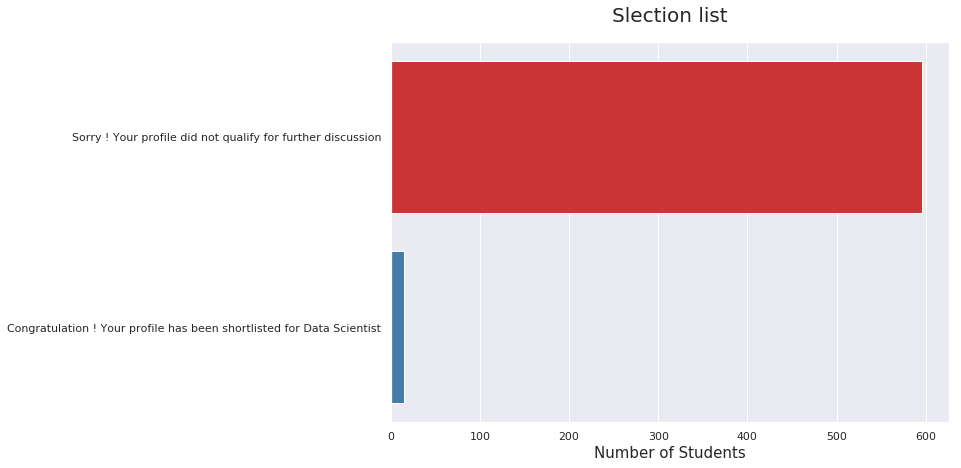

In [50]:
plt.figure(figsize=(10,7))
chains=data['Selection_list'].value_counts()
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Slection list",size=20,pad=20)
plt.xlabel("Number of Students",size=15)

In [51]:
data2=data[['Application_ID','Selection_list']]
data2.head(50)

,Application_ID,Selection_list
0,DS0001,Sorry ! Your profile did not qualify for furth...
1,DS0002,Sorry ! Your profile did not qualify for furth...
2,DS0003,Sorry ! Your profile did not qualify for furth...
3,DS0004,Sorry ! Your profile did not qualify for furth...
4,DS0005,Sorry ! Your profile did not qualify for furth...
5,DS0006,Sorry ! Your profile did not qualify for furth...
6,DS0007,Sorry ! Your profile did not qualify for furth...
7,DS0008,Sorry ! Your profile did not qualify for furth...
8,DS0009,Sorry ! Your profile did not qualify for furth...
9,DS0010,Sorry ! Your profile did not qualify for furth...


In [52]:
print('Application_ID','                       Result')
print('---------------------------------------------------------------------------------------')
for i in range(0,611):
    line=data2.iloc[i,1]
    if line=='Congratulation ! Your profile has been shortlisted for Data Scientist':
        print('{0},           {1}'.format(data2.iloc[i,0],data2.iloc[i,1]))
    

Application_ID                        Result
---------------------------------------------------------------------------------------
DS0077,           Congratulation ! Your profile has been shortlisted for Data Scientist
DS0163,           Congratulation ! Your profile has been shortlisted for Data Scientist
DS0172,           Congratulation ! Your profile has been shortlisted for Data Scientist
DS0180,           Congratulation ! Your profile has been shortlisted for Data Scientist
DS0187,           Congratulation ! Your profile has been shortlisted for Data Scientist
DS0273,           Congratulation ! Your profile has been shortlisted for Data Scientist
DS0278,           Congratulation ! Your profile has been shortlisted for Data Scientist
DS0320,           Congratulation ! Your profile has been shortlisted for Data Scientist
DS0381,           Congratulation ! Your profile has been shortlisted for Data Scientist
DS0426,           Congratulation ! Your profile has been shortlisted for Da

# Details of shortlisted Candiadtes

In [53]:
print('Application_ID','                       Result')
print('---------------------------------------------------------------------------------------')
for i in range(0,611):
    line=data2.iloc[i,1]
    if line=='Sorry ! Your profile did not qualify for further discussion':
        print('{0},           {1}'.format(data2.iloc[i,0],data2.iloc[i,1]))

Application_ID                        Result
---------------------------------------------------------------------------------------
DS0001,           Sorry ! Your profile did not qualify for further discussion
DS0002,           Sorry ! Your profile did not qualify for further discussion
DS0003,           Sorry ! Your profile did not qualify for further discussion
DS0004,           Sorry ! Your profile did not qualify for further discussion
DS0005,           Sorry ! Your profile did not qualify for further discussion
DS0006,           Sorry ! Your profile did not qualify for further discussion
DS0007,           Sorry ! Your profile did not qualify for further discussion
DS0008,           Sorry ! Your profile did not qualify for further discussion
DS0009,           Sorry ! Your profile did not qualify for further discussion
DS0010,           Sorry ! Your profile did not qualify for further discussion
DS0011,           Sorry ! Your profile did not qualify for further discussion
DS0012,  

# Details of Non Qualified Candidates

In [54]:
data_labled=data.apply(lable.fit_transform)

In [55]:
data_labled

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Data Science (out of 3),Other skills,Institute,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,total,Selection_list
0,0,5,1,0,3,433,121,8,61,14,80,91,83,36,27,1
1,1,47,2,1,2,60,8,42,103,15,80,219,83,36,23,1
2,2,47,2,0,0,140,417,14,82,13,80,143,175,29,9,1
3,3,18,2,0,2,22,147,22,94,16,80,126,177,34,23,1
4,4,5,2,0,0,431,431,8,64,13,80,159,83,36,12,1
5,5,37,2,2,0,75,170,14,91,16,80,24,83,36,11,1
6,6,55,0,0,1,142,143,1,64,16,80,135,162,27,6,1
7,7,5,2,2,0,472,126,1,99,11,80,59,83,36,14,1
8,8,66,2,0,1,179,415,14,35,17,80,152,83,36,16,1
9,9,5,0,0,0,164,238,27,92,14,80,222,94,121,0,1


In [56]:
data_scaled=std.fit_transform(data_labled)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [57]:
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)

In [58]:
data_scaled.head()


,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Data Science (out of 3),Other skills,Institute,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,total,Selection_list
0,-1.729218,-0.690220,-1.011329,-0.634899,2.098593,1.154037,-0.746221,-0.907312,0.037997,0.199366,0.4357,-0.641745,-0.315160,-0.455957,1.140757,0.158644
1,-1.723549,1.533842,0.270667,0.454773,1.112254,-1.309143,-1.654501,1.916433,1.362843,0.591046,0.4357,1.134124,-0.315160,-0.455957,0.706217,0.158644
2,-1.717879,1.533842,0.270667,-0.634899,-0.860423,-0.780847,1.632992,-0.409004,0.700420,-0.192314,0.4357,0.079702,1.760014,-0.643922,-0.814674,0.158644
3,-1.712210,-0.001820,0.270667,-0.634899,1.112254,-1.560083,-0.537236,0.255407,1.078948,0.982727,0.4357,-0.156156,1.805127,-0.509662,0.706217,0.158644
4,-1.706540,-0.690220,0.270667,-0.634899,-0.860423,1.140829,1.745523,-0.907312,0.132629,-0.192314,0.4357,0.301685,-0.315160,-0.455957,-0.488769,0.158644


In [59]:
data_scaled.drop('Application_ID',axis=1,inplace=True)

## Since we are using bivariate analysis predicting Selected or Non Selected Students we can use classification techniques to predict the target variable.

In [60]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [61]:
final_data=pd.DataFrame(data_labled)

In [62]:
x =final_data.drop(['Application_ID','Selection_list'],axis=1)
y =data['Selection_list']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [65]:
array = [LogisticRegressionCV(),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=50,n_jobs=5),
        AdaBoostClassifier(),
        GradientBoostingClassifier()]

In [66]:
for i in range (0,len(array)):
    array[i].fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/log

In [67]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report

In [68]:
l=[]
for i in range (0,len(array)):
    y_pred=array[i].predict(x_test)
    print(y_pred)
    l.append(accuracy_score(y_pred,y_test))
print(l)

['Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further disc

In [69]:
final = pd.DataFrame(l,index=('Logistic regreesion','Decision tree','Randomforest','Ada boost','Gradient boost'),columns=['Accuracy score'])
final

,Accuracy score
Logistic regreesion,0.98913
Decision tree,1.00000
Randomforest,1.00000
Ada boost,1.00000
Gradient boost,1.00000


In [70]:
rf = DecisionTreeClassifier()

In [71]:
rf_model = rf.fit(x_train,y_train)
rf_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
y_pred = rf.predict(x_test)
print(y_pred)

['Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Sorry ! Your profile did not qualify for further discussion'
 'Congratulation ! Your profile has been shortlisted for Data Scientist'
 'Sorry ! Your profile did not qualify for fu

In [73]:
print(classification_report(y_pred,y_test))

                                                                       precision    recall  f1-score   support

Congratulation ! Your profile has been shortlisted for Data Scientist       1.00      1.00      1.00         5
          Sorry ! Your profile did not qualify for further discussion       1.00      1.00      1.00       179

                                                            micro avg       1.00      1.00      1.00       184
                                                            macro avg       1.00      1.00      1.00       184
                                                         weighted avg       1.00      1.00      1.00       184



### Both the precision and recall score are high, which implies our model able to predict and detect perfectly.
​

In [74]:
# create client to access our WML service
from watson_machine_learning_client import WatsonMachineLearningAPIClient

wml_credentials = {
   "apikey": "jumFOX1UNrtGbgAJwMBiIwZniZsX-xrzFqf5lE5rggM5",
  "iam_apikey_description": "Auto-generated for key e2be9d0e-fb15-489e-9d32-ec2cd3d79c3d",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/77eeb40dd80b4cd3bc0d831f729fe8cd::serviceid:ServiceId-38eca24b-5d17-47a3-8393-f297e0ba16c7",
  "instance_id": "2cbf57b6-c819-4000-99fd-079a570f07b3",
  "password":"Cloud@123", 
  "url": "https://us-south.ml.cloud.ibm.com",
  "username":"mahendrakgv@gmail.com",
}

client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.version)

1.0.376


In [75]:
# Use this cell to do any cleanup of previously created models and deployments
client.repository.list_models()
client.deployments.list()

----  ----  -------  ---------
GUID  NAME  CREATED  FRAMEWORK
----  ----  -------  ---------
----  ----  ----  -----  -------  ---------  -------------
GUID  NAME  TYPE  STATE  CREATED  FRAMEWORK  ARTIFACT TYPE
----  ----  ----  -----  -------  ---------  -------------


In [76]:
# store the model in WML
meta_props={client.repository.ModelMetaNames.NAME: "Decision Tree Classifier model to predict shortlisted for Data Scientist "}
published_model = client.repository.store_model(model=rf, meta_props={client.repository.ModelMetaNames.NAME: "Decision Tree Classifier model to predict shortlisted for Data Scientist"})

In [77]:
# new list of models
client.repository.list_models()

# get UID of our just stored model
model_uid = client.repository.get_model_uid(published_model)
print("Model id: {}".format(model_uid))

------------------------------------  ------------------------------------------------------------------------  ------------------------  -----------------
GUID                                  NAME                                                                      CREATED                   FRAMEWORK
b359bc35-4331-4e48-ab4a-3c2c0beb4544  Decision Tree Classifier model to predict shortlisted for Data Scientist  2020-02-27T12:26:08.206Z  scikit-learn-0.20
------------------------------------  ------------------------------------------------------------------------  ------------------------  -----------------
Model id: b359bc35-4331-4e48-ab4a-3c2c0beb4544


In [78]:
# create deployment
created_deployment = client.deployments.create(model_uid, name="customer_churn_model_gb")

# new list of deployments
client.deployments.list()

# get UID of our new deployment
deployment_uid = client.deployments.get_uid(created_deployment)
print("Deployment id: {}".format(deployment_uid))
print(created_deployment)




#######################################################################################

Synchronous deployment creation for uid: 'b359bc35-4331-4e48-ab4a-3c2c0beb4544' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4ebfca08-8307-4c8d-9658-b744eb1b8293'
------------------------------------------------------------------------------------------------


------------------------------------  -----------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                     TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
4ebfca08-8307-4c8d-9658-b744eb1b8293  customer_churn_model_gb  online  DEPLOY_SUCCESS  2020-02-27T12:27:52.021Z  sc

In [79]:
# get scoring end point
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/2cbf57b6-c819-4000-99fd-079a570f07b3/deployments/4ebfca08-8307-4c8d-9658-b744eb1b8293/online
